# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2023/2024

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania i oceny notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z fragmentów kodu opracowanego w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce notatnika.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu, odpowiedzi uzupełniane manualnie nie podlegają ocenie.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają na celu wyłapać podstawowe błędy. Przejście przez kod wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie i zostanie ocenione na maksymalną liczbę punktów.
- Zadania należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem). Rozmiar poziomy figur nie powinien przekraczać 20 cali.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł.
- Zakresy osi wykresów przedstawiających rozkłady punktów w przestrzeni powinny być docięte do granic obszaru, na którym został wygenerowany proces punktowy.
- Proporcje osi wykresów przedstawiających rozkłady punktów w przestrzeni powinny być dobrane tak, aby wykresy odzwierciedlały rzeczywisty rozkład punktów w przestrzeni. Nie należy osiągać tego efektu manipulując rozmiarem całej figury.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (nazwa zespołu oraz imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

---

## Zestaw zadań 3: Badanie intensywności procesów punktowych (część 2)

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

In [3]:
def homogeneous_poisson_on_rectangle(intensity, x_lim, y_lim):
    area = (x_lim[-1] - x_lim[0])*(y_lim[-1] - y_lim[0])
    number_of_points = np.random.poisson(intensity*area)
    x = np.random.uniform(x_lim[0], x_lim[-1], number_of_points)
    y = np.random.uniform(y_lim[0], y_lim[-1], number_of_points)
    points = pd.DataFrame({"X" : x, "Y" : y})
    return points

def point_count_on_subregions(points, bins, x_lim, y_lim):
    X = np.linspace(x_lim[0],x_lim[-1],bins[0]+1)
    Y = np.linspace(y_lim[0],y_lim[-1],bins[-1]+1)
    number_of_points_in_subregions, X_coordinates_of_subregions, Y_coordinates_of_subregions = np.histogram2d(points["X"],points["Y"],bins=(X,Y))
    #zwraca transponowane T bo wspolrzedne są inaczej 
    return [number_of_points_in_subregions.T,X_coordinates_of_subregions,Y_coordinates_of_subregions]

### Wczytanie danych

Załączone do notatnika pliki zawierają trzy różne rozkłady punktowe (`points_1`, `points_2` i `points_3`) wygenerowane dla zakresu współrzędnych X $[10, 30]$ i Y $[-15, -5]$ oraz dane wykorzystywane w zawartych w notatniku automatycznych testach.

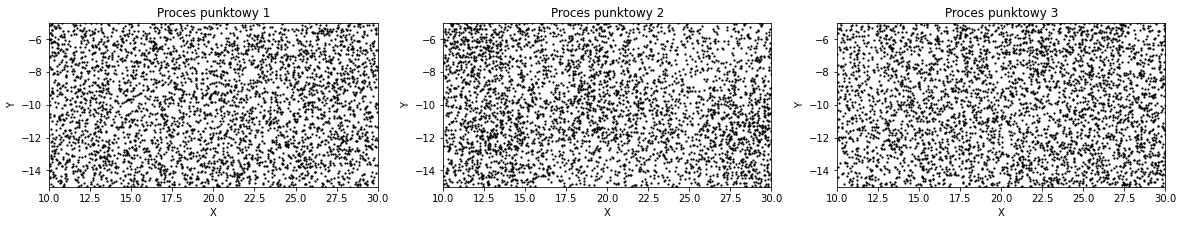

W celu wczytania danych do notatnika umieść wszystkie pliki w tym samym folderze, w którym znajduje się notatnik.

In [4]:
points_1 = pd.read_pickle('points_1.pkl')
points_2 = pd.read_pickle('points_2.pkl')
points_3 = pd.read_pickle('points_3.pkl')

test_data_1 = np.load("test_data_1.npy")
test_data_2 = np.load("test_data_2.npy")
test_data_3 = pd.read_pickle('test_data_3.pkl')

### Zadanie 1: Test chi-kwadrat Pearsona (20 pkt)

#### a) Przygotowanie funkcji

Przygotuj funkcję `pearsons_chi2_test()`, która będzie przeprowadzać test istotności chi-kwadrat Pearsona i wyświetlać jego wynik zgodnie z pokazanym poniżej schematem oraz funkcje pomocnicze `distribution_table()` i `poisson_distribution_table()`, które będą przygotowywać szeregi rozdzielcze testowanego rozkładu oraz teoretycznego rozkładu Poissona.

Algorytm postępowania:
1. Przygotowanie danych
    - Dzielimy analizowany obszar na identyczne podobszary ułożone w równomiernej siatce (w wierszach i kolumnach) i zliczamy punkty znajdujące się w poszczególnych podobszarach (punkty znajdujące się na granicach podobszarów powinny być zliczone tylko do jednego z nich).
    - Określamy jaka jest minimalna i maksymalna liczba punktów zaobserwowana w obrębie podobszaru, a następnie zliczamy w ilu podobszarach występują kolejne liczby punktów od wartości minimalnej do wartości maksymalnej uwzględniając również te wartości zliczeń, które nie występują w żadnym z podobszarów.
    - Dla wszystkich wartości z zakresu od wartości minimalnej do maksymalnej wyliczamy prawdopodobieństwa ich wystąpienia w przypadku, gdyby rozkład był rozkładem teoretycznym do którego porównujemy analizowany rozkład.

2. Test statystyczny
    - Formułujemy hipotezę zerową H0 i hipotezę alternatywną H1: <br/>
    H0: Testowana zmienna ma przyjęty rozkład teoretyczny <br/>
    H1: Testowana zmienna nie ma przyjętego rozkładu teoretycznego
    - Obliczamy wartość statystyki testowej $\chi^2$: <br/>
    $\chi^2 = \sum_{i=1}^{k} \frac{(n_i-n p_i)^2}{np_i}$ <br/>
    gdzie: $k$ - liczba wariantów badanej cechy, $n_i$ - liczebność i-tego wariantu testowanego rozkładu, $n$ - liczba punktów testowanego rozkładu, $p_i$ - prawdopodobieństwo i-tego wariantu rozkładu teoretycznego.
    - Z rozkładu chi-kwadrat wyznaczamy obszar krytyczny testu istotności $\chi^2_{\alpha}$: <br/>
    $\chi^2_{\alpha} = \chi^2_{1-\alpha, k-1}$ <br/>
    gdzie:  $\alpha$ - poziom istotności, $k$ - liczba wariantów rozkładu.
    - Podejmujemy decyzję weryfikującą: <br/>
    $\chi^2 >= \chi^2_{\alpha}$ - Odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha = A <br/>
    $\chi^2 < \chi^2_{\alpha}$ - Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha = A

Funkcja `pearsons_chi2_test()` poza zwracaniem wartości określonych w docstring funkcji powinna również wyświetlać komunikat o wyniku testu zawierający: <br/>
- nazwę wykonywanego testu,
- postać hipotezy zerowej,
- postać hipotezy alternatywnej,
- wartości wyznaczonych statystyk $\chi^2$ i $\chi^2_{\alpha}$,
- zależność między wartościami statystyk decydującą o wyniku testu,
- informację o wyniku testu: "Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha = A" lub "Odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha = A".

Wszystkie występujące w komunikacie wartości liczbowe powinny być automatycznie uzupełniane przez funkcję i odpowiednio sformatowane (4 miejsca po przecinku w przypadku $\chi^2$ i $\chi^2_{\alpha}$, pozostałe wartości z formatowaniem domyślnym).

Przykład komunikatu:
<br/>
`Test chi-kwadrat Pearsona` <br/>
`H0: Testowana zmienna ma przyjęty rozkład teoretyczny` <br/>
`H1: Testowana zmienna nie ma przyjętego rozkładu teoretycznego` <br/>
`chi2 = 19.521 chi2_alpha = 21.129`<br/>
`chi2 < chi2_alpha` <br/>
`Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1 - alpha = 0.95` <br/>

Uwagi do wykonania zadania:
- W części zadania dotyczącej podziału obszaru analizy na podobszary i zliczenia znajdujących się w nich punktów nie należy pisać kodu od podstaw, a jedynie skorzystać z przygotowanej wcześniej funkcji `point_count_on_subregions()`, którą można wkleić we wskazanej komórce na początku notatnika.
- Podczas wyznaczania wartości statystyki $\chi^2_{\alpha}$ należy skorzystać z modułu `scipy.stats.chi2`.
- Przedstawiony schemat przeprowadzenia testu jest uproszczony i nie zawiera pojęcia stopni swobody, których liczba dla rozwiązywanego problemu jest równa 0.

In [5]:
def distribution_table(bin_counts):
    K =  np.arange(int(np.min(bin_counts)), int(np.max(bin_counts)) + 1, 1)
    NK = np.array([np.count_nonzero(bin_counts == number) for number in K])
    distribution_dictionary = {"K": K.T, "N(K)" : NK.T}
    return_dataframe = pd.DataFrame(data = distribution_dictionary)
    return return_dataframe

def poisson_distribution_table(k, mu):
    K = np.array(k)
    PK = sp.stats.poisson.pmf(K,mu)/sp.stats.poisson.pmf(K,mu).sum()
    poisson_distribution_dictionary = {"K" : K.T, "P(K)" : PK}
    return_dataframe = pd.DataFrame(data = poisson_distribution_dictionary)
    return return_dataframe
    
def pearsons_chi2_test(tested_distribution, theoretical_distribution, alpha):
    merged_data = pd.merge(tested_distribution, theoretical_distribution, on="K")
    observed_freq = merged_data["N(K)"].values
    expected_freq = merged_data["P(K)"].values * tested_distribution["N(K)"].sum()
    
    chi2 = np.sum((observed_freq - expected_freq) ** 2 / expected_freq)
    deegres_of_freedom = len(observed_freq) - 1
    chi2_alpha = sp.stats.chi2.ppf(1 - alpha, deegres_of_freedom)
    
    if chi2 >= chi2_alpha:
        H = 1
        print("Test chi-kwadrat Pearsona\nH0: Testowana zmienna ma przyjęty rozkład teoretyczny\nH1: Testowana zmienna nie ma przyjętego rozkładu teoretycznego\nchi2 = "+str(chi2)+" chi2_alpha = "+str(chi2_alpha)+"\nchi2 > chi2_alpha\nWynik testu istotności daje podstawy do odrzucenia H0 na rzecz H1 na poziomie istotności 1 - alpha = "+str(alpha))
    else:
        H = 0
        print("Test chi-kwadrat Pearsona\nH0: Testowana zmienna ma przyjęty rozkład teoretyczny\nH1: Testowana zmienna nie ma przyjętego rozkładu teoretycznego\nchi2 = "+str(chi2)+" chi2_alpha = "+str(chi2_alpha)+"\nchi2 < chi2_alpha\nWynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1 - alpha = "+str(alpha))
    return chi2, chi2_alpha, H
    

In [6]:
# Komórka testowa
# Testy funkcji distribution_table()
test_distribution_table_1 = distribution_table(test_data_1)
test_distribution_table_2 = distribution_table(test_data_2)
assert type(test_distribution_table_2) == pd.DataFrame
assert test_distribution_table_2.shape == (15, 2)
assert list(test_distribution_table_2.columns) == ["K", "N(K)"]
assert np.all(np.isclose(test_distribution_table_2["K"].values, np.array([0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.])))
assert np.all(np.isclose(test_distribution_table_2["N(K)"].values, np.array([5., 14., 21., 24., 33., 23., 25., 17., 21.,  3.,  4.,  7.,  2., 0.,  1.])))
# Testy funkcji poisson_distribution_table()
test_poisson_distribution_table_1 = poisson_distribution_table(test_distribution_table_1["K"], 5)
test_poisson_distribution_table_2 = poisson_distribution_table(test_distribution_table_2["K"], 5)
assert type(test_poisson_distribution_table_2) == pd.DataFrame
assert test_poisson_distribution_table_1.shape == (11, 2)
assert list(test_poisson_distribution_table_1.columns) == ["K", "P(K)"]
assert np.all(np.isclose(test_poisson_distribution_table_1["K"].values, np.array([1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])))
assert np.all(np.isclose(test_poisson_distribution_table_1["P(K)"].values, np.array([0.03410552, 0.08526379, 0.14210632, 0.1776329 , 0.1776329 ,
                                                                                     0.14802742, 0.10573387, 0.06608367, 0.03671315, 0.01835657,
                                                                                     0.0083439])))
# Testy funkcji pearsons_chi2_test()
test_results_1 = pearsons_chi2_test(test_distribution_table_1, test_poisson_distribution_table_1, 0.1)
assert np.all(np.isclose(test_results_1, (5.7730859496816995, 15.987179172105265, 0)))
print()
test_results_2 = pearsons_chi2_test(test_distribution_table_2, test_poisson_distribution_table_2, 0.02)
assert np.all(np.isclose(test_results_2, (61.16955575576236, 26.872764642314312, 1)))

Test chi-kwadrat Pearsona
H0: Testowana zmienna ma przyjęty rozkład teoretyczny
H1: Testowana zmienna nie ma przyjętego rozkładu teoretycznego
chi2 = 5.7730859496816995 chi2_alpha = 15.987179172105265
chi2 < chi2_alpha
Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1 - alpha = 0.1

Test chi-kwadrat Pearsona
H0: Testowana zmienna ma przyjęty rozkład teoretyczny
H1: Testowana zmienna nie ma przyjętego rozkładu teoretycznego
chi2 = 61.16955575576242 chi2_alpha = 26.872764642314312
chi2 > chi2_alpha
Wynik testu istotności daje podstawy do odrzucenia H0 na rzecz H1 na poziomie istotności 1 - alpha = 0.02


#### b) Weryfikacja hipotez o rozkładach 1 i 2
Wykorzystaj przygotowaną funkcję do zweryfikowania hipotez, że rozkłady punktowe `points_1` i `points_2` są jednorodnymi rozkładami Poissona o intensywności równej 20. W obliczeniach przyjmij $\alpha=0.05$, zakres współrzędnej $X$ [10, 30], zakres współrzędnej $Y$ [-15, -5] oraz ustaw podział obszaru na 40 podobszarów wzdłuż osi $X$ i 20 podobszarów wzdłuż osi $Y$. Wyniki przeprowadzonych testów zapisz odpowiednio do zmiennych `results_1` i `results_2`.

In [7]:
# Weryfikacja hipotezy o rozkładzie 1
number_of_points_in_subregions1, _, _ = point_count_on_subregions(points_1, [40,20], [10,30], [-15,-5])
distibution_tabel_1 = distribution_table(number_of_points_in_subregions1)
results_1 = pearsons_chi2_test(distibution_tabel_1, poisson_distribution_table(distibution_tabel_1["K"].T, 20*20*10/40/20), 0.05)

Test chi-kwadrat Pearsona
H0: Testowana zmienna ma przyjęty rozkład teoretyczny
H1: Testowana zmienna nie ma przyjętego rozkładu teoretycznego
chi2 = 13.647577626998354 chi2_alpha = 21.02606981748307
chi2 < chi2_alpha
Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1 - alpha = 0.05


In [8]:
# Weryfikacja hipotezy o rozkładzie 2
number_of_points_in_subregions2, _, _ = point_count_on_subregions(points_2, [40,20], [10,30], [-15,-5])
distibution_tabel_2 = distribution_table(number_of_points_in_subregions2)
results_2 = pearsons_chi2_test(distibution_tabel_2, poisson_distribution_table(distibution_tabel_2["K"].T, 20*20*10/40/20), 0.05)

Test chi-kwadrat Pearsona
H0: Testowana zmienna ma przyjęty rozkład teoretyczny
H1: Testowana zmienna nie ma przyjętego rozkładu teoretycznego
chi2 = 65.14156870602986 chi2_alpha = 23.684791304840576
chi2 > chi2_alpha
Wynik testu istotności daje podstawy do odrzucenia H0 na rzecz H1 na poziomie istotności 1 - alpha = 0.05


In [9]:
### Komórka testowa
# Testy nie są widoczne w wersji do uzupełnienia

### Zadanie 2: Test Kołmogorowa - Smirnowa (10 pkt)

#### a) Przygotowanie funkcji

Przygotuj funkcję `kolmogorow_smirnow_test()`, która będzie przeprowadzać test istotności Kołmogorowa-Smirnowa i wyświetlać jego wynik zgodnie z pokazanym poniżej schematem.

Algorytm postępowania:
- Formułujemy hipotezę zerową i hipotezę alternatywną H1: <br/>
H0: Testowana zmienna ma przyjęty rozkład teoretyczny <br/>
H1: Testowana zmienna nie ma przyjętego rozkładu teoretycznego
- Obliczamy wartość statystyki testowej $\lambda$: <br/>
$D = \sup_{x}(|F_t - F_0|)$ <br/>
$\lambda = D\sqrt{n}$ <br/>
gdzie: $F_t$ - dystrybuanta testowanego rozkładu,  $F_0$ - dystrybuanta rozkładu teoretycznego, $n$ - liczba punktów.
- Z rozkładu Kołomogorowa wyznaczamy obszar krytyczny testu istotności $\lambda_{\alpha}$: <br/>
$\lambda_{\alpha} = \lambda_{1-\alpha}$ <br/>
gdzie:  $\alpha$ - poziom istotności.
- Podejmujemy decyzję weryfikującą: <br/>
$\lambda >= \lambda_{\alpha}$ - Odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha = A <br/>
$\lambda < \lambda_{\alpha}$ - Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha = A

Funkcja `kolmogorow_smirnow_test()` poza zwracaniem wartości określonych w docstring funkcji powinna również wyświetlać komunikat o wyniku testu zawierający: <br/>
- nazwę wykonywanego testu oraz informację, dla której współrzędnej jest on wykonany,
- postać hipotezy zerowej,
- postać hipotezy alternatywnej,
- wartości wyznaczonych statystyk lambda i lambda_alpha,
- zależność między wartościami statystyk decydującą o wyniku testu,
- informację o wyniku testu: "Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha = A" lub "Odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha = A".

Wszystkie występujące w komunikacie wartości liczbowe powinny być automatycznie uzupełniane przez funkcję i odpowiednio sformatowane (4 miejsca po przecinku w przypadku lambda i lambda_alpha, pozostałe wartości z formatowaniem domyślnym).

Przykład komunikatu:<br/>
`Test Kołmogorowa-Smirnowa dla współrzędnej X` <br/>
`H0: Testowana zmienna ma przyjęty rozkład teoretyczny` <br/>
`H1: Testowana zmienna nie ma przyjętego rozkładu teoretycznego` <br/>
`lambda = 2.036  lambda_alpha = 1.255`<br/>
`lambda >= lambda_alpha` <br/>
`Odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha = 0.95` <br/>

Uwagi do wykonania zadania:
- Podczas wyznaczania wartości statystyk $\lambda$ i $\lambda_{\alpha}$ należy skorzystać z funkcji `sp.stats.kstest` oraz modułu `scipy.stats.kstwobign`.

In [10]:
def kolmogorow_smirnow_test(tested_points, theoretical_points, alpha):
    """
    Parameters
    -------
    tested_points: DataFrame
        Tablica zawierająca kolumnę ze współrzędnymi punktów testowanego rozkładu opisaną jako "X" lub "Y".
    theoretical_points: DataFrame
        Tablica zawierająca kolumnę ze współrzędnymi punktów teoretycznego rozkładu opisaną jako "X" lub "Y".
    alpha: float
        Wartość z zakresu [0,1] określająca poziom istotności.
    
    Returns
    -------
    l: float
        Wyliczona na podstawie próby losowej wartość statystyki lambda.
    l_alpha: float
        Wyliczona wartość statystyki lambda_alpha.
    H: int
        Wynik testu statystycznego, przyjmuje wartość:
        0 - gdy wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha,
        1 - gdy następuje odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha.
    """
   
    name = tested_points.name
    print( "Test Kołmogorowa-Smirnowa dla współrzędnej", name)
    print( "H0: Testowana zmienna ma przyjęty rozkład teoretyczny")
    print( "H1: Testowana zmienna nie ma przyjętego rozkładu teoretycznego" )
    result = sp.stats.kstest(tested_points, theoretical_points)
    l = result.statistic*np.sqrt(len(tested_points))
    l_alpha = sp.stats.kstwobign.ppf(1 - alpha)
    print(f"lambda = {l:.4f} lambda_alpha = {l_alpha:.4f}")
    if (l >= l_alpha):
        H = 1
        print(f"Odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha = {1-alpha}\n")
    else:
        H = 0
        print(f"Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha = {1-alpha}\n")

    return (l,l_alpha,H)
        


In [11]:
# Komórka testowa
test_results_3 = kolmogorow_smirnow_test(test_data_3['X'], test_data_3['X_TEST'], 0.02)
print()
test_results_4 = kolmogorow_smirnow_test(test_data_3['Y'], test_data_3['Y_TEST'], 0.1)
assert np.all(np.isclose(test_results_3, (0.7106504259900276, 1.5174269646320033, 0)))
assert np.all(np.isclose(test_results_4, (1.693020132505654, 1.2238478702170825, 1)))

Test Kołmogorowa-Smirnowa dla współrzędnej X
H0: Testowana zmienna ma przyjęty rozkład teoretyczny
H1: Testowana zmienna nie ma przyjętego rozkładu teoretycznego
lambda =0.7107 lambda_alpha =1.5174
Wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha = 0.98

Test Kołmogorowa-Smirnowa dla współrzędnej Y
H0: Testowana zmienna ma przyjęty rozkład teoretyczny
H1: Testowana zmienna nie ma przyjętego rozkładu teoretycznego
lambda =1.6930 lambda_alpha =1.2238
Odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha = 0.9


#### b) Weryfikacja hipotezy o rozkładzie 3
Wykorzystaj przygotowaną funkcję do zweryfikowania hipotezy, że rozkład punktowy `points_3` jest jednorodnym rozkładem Poissona o intensywności równej 20. W obliczeniach przyjmij $\alpha=0.05$, zakres współrzędnej $X$ [10, 30], zakres współrzędnej $Y$ [-15, -5]. Wyniki przeprowadzonych testów zapisz odpowiednio do zmiennych `results_3X` i `results_3Y`.

Uwagi do wykonania zadania:
 - Test należy przeprowadzić niezależnie dla współrzędnej X i Y. Finalna decyzja jest podejmowana na podstawie wyników obu testów.

In [ ]:
tested_points = points_3
theoretical_points = homogeneous_poisson_on_rectangle(20, [10,30], [-15,-5])
alpha = 0.05
results_3X = kolmogorow_smirnow_test(tested_points["X"], theoretical_points["X"], alpha)
results_3Y = kolmogorow_smirnow_test(tested_points["Y"], theoretical_points["Y"], alpha)

if results_3X[2] == 0 and results_3Y[2] == 0:
    print("Brak podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności alpha =", alpha)
else:
    print("Odrzucenie H0 na rzecz H1 na poziomie istotności alpha =", alpha)

Test Kołmogorowa-Smirnowa dla współrzędnej X
H0: Testowana zmienna ma przyjęty rozkład teoretyczny
H1: Testowana zmienna nie ma przyjętego rozkładu teoretycznego
lambda = 2.7702 lambda_alpha = 1.3581
Odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha = 0.95

Test Kołmogorowa-Smirnowa dla współrzędnej Y
H0: Testowana zmienna ma przyjęty rozkład teoretyczny
H1: Testowana zmienna nie ma przyjętego rozkładu teoretycznego
lambda = 1.3830 lambda_alpha = 1.3581
Odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha = 0.95

Odrzucenie H0 na rzecz H1 na poziomie istotności alpha = 0.05


In [ ]:
### Komórka testowa
# Testy nie są widoczne w wersji do uzupełnienia